In [1]:
# Add src folder to Python path so db_config can be imported
import sys
import os

sys.path.append(os.path.abspath("../src"))

In [2]:
# Used to execute SQL queries and show results
from sqlalchemy import text
from db_config import engine
import pandas as pd

# Table record counts


In [ ]:

def record_count(table):
    with engine.connect() as conn:
        result = conn.execute(
            text(f"SELECT COUNT(*) FROM {table}")
        ).scalar()
    return  result

#### we have written  a dynamic function which will take table name as a parameter and return count of records

In [13]:
record_count('sleepday_merged')

413

In [ ]:


def get_all_tables():
    with engine.connect() as conn:
        result = conn.execute(
            text("""
                SELECT table_name
                FROM information_schema.tables
                WHERE table_schema = :db_name
                  AND table_type = 'BASE TABLE'
            """),
            {"db_name": "fitbit_db"}  
        )
        return [row[0] for row in result]


####  get_all_tables function  will return all  existing tables in the fitbit_db database

In [22]:
tables=get_all_tables()

>* we have stored all tables in a variable tables 
>* we used for loop to through tables and printed count of records

In [28]:
dict={}
for table in tables:
    res=record_count(table)
    dict[table]=res
    print(f'{table} :  {res}')
    print('-'*40)



dailyactivity_merged :  940
----------------------------------------
dailycalories_merged :  940
----------------------------------------
dailyintensities_merged :  940
----------------------------------------
dailysteps_merged :  940
----------------------------------------
heartrate_seconds_merged :  2483658
----------------------------------------
hourlycalories_merged :  22099
----------------------------------------
hourlyintensities_merged :  22099
----------------------------------------
hourlysteps_merged :  22099
----------------------------------------
minutecaloriesnarrow_merged :  1325580
----------------------------------------
minutecalorieswide_merged :  21645
----------------------------------------
minuteintensitiesnarrow_merged :  1325580
----------------------------------------
minuteintensitieswide_merged :  21645
----------------------------------------
minutemetsnarrow_merged :  1325580
----------------------------------------
minutesleep_merged :  188521
--------

# Unique user counts

In [35]:
with engine.connect() as conn:
        result = conn.execute(
            text(f"SELECT COUNT(DISTINCT ID) FROM dailyactivity_merged")
        ).scalar()
print(f'Unique Users:{result}')


Unique Users:33


# Date coverage per table

In [38]:
with engine.connect() as conn:
        result = conn.execute(
            text(f"SELECT MIN(ACTIVITYDATE),MAX(ACTIVITYDATE)  FROM dailyactivity_merged")
        ).fetchall()
result

[(datetime.date(2016, 4, 12), datetime.date(2016, 5, 12))]

#### we have found that the data is collected from 2016/04/12 to 2016/05/12(31 days)

# Distributions of steps, calories, sleep

In [56]:
with engine.connect() as conn:
        result = conn.execute(
            text(f"SELECT id, avg(Calories) as  'mean colories' FROM dailyactivity_merged group by id")
        )
df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,id,mean colories
0,1503960366,1816.4194
1,1624580081,1483.3548
2,1644430081,2811.3000
3,1844505072,1573.4839
4,1927972279,2172.8065
5,2022484408,2509.9677
6,2026352035,1540.6452
7,2320127002,1724.1613
8,2347167796,2043.4444
9,2873212765,1916.9677


In [52]:
with engine.connect() as conn:
        result = conn.execute(
            text(f"SELECT id,avg(TotalSteps) as mean_steps  FROM dailyactivity_merged group by id")
        )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,id,mean_steps
0,1503960366,12116.7419
1,1624580081,5743.9032
2,1644430081,7282.9667
3,1844505072,2580.0645
4,1927972279,916.1290
5,2022484408,11370.6452
6,2026352035,5566.8710
7,2320127002,4716.8710
8,2347167796,9519.6667
9,2873212765,7555.7742


In [57]:
tables

['dailyactivity_merged',
 'dailycalories_merged',
 'dailyintensities_merged',
 'dailysteps_merged',
 'heartrate_seconds_merged',
 'hourlycalories_merged',
 'hourlyintensities_merged',
 'hourlysteps_merged',
 'minutecaloriesnarrow_merged',
 'minutecalorieswide_merged',
 'minuteintensitiesnarrow_merged',
 'minuteintensitieswide_merged',
 'minutemetsnarrow_merged',
 'minutesleep_merged',
 'minutestepsnarrow_merged',
 'minutestepswide_merged',
 'sleepday_merged',
 'weightloginfo_merged']

In [59]:
with engine.connect() as conn:
        result = conn.execute(
            text(f"SELECT id,avg(TotalTimeInBed) as mean_TotalTimeInBed FROM sleepday_merged group by id")
        )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,id,mean_TotalTimeInBed
0,1503960366,383.2000
1,1644430081,346.0000
2,1844505072,961.0000
3,1927972279,437.8000
4,2026352035,537.6429
5,2320127002,69.0000
6,2347167796,491.3333
7,3977333714,461.1429
8,4020332650,379.7500
9,4319703577,501.9615


# min and max steps per day by each user

In [12]:
with engine.connect() as conn:
        result = conn.execute(
            text("""SELECT ID,ACTIVITYDAY, STEPTOTAL
                 FROM (SELECT ID, ACTIVITYDAY, STEPTOTAL, RANK() OVER(PARTITION BY ID ORDER BY STEPTOTAL DESC) AS MAX_STEPS,
                                RANK() OVER(PARTITION BY ID ORDER BY STEPTOTAL ) AS MINI_STEPS
                FROM dailysteps_merged) AS MAX_MIN
                WHERE MAX_STEPS =1 OR MINI_STEPS=1
                ORDER BY ID;
                """)
        )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,ID,ACTIVITYDAY,STEPTOTAL
0,1503960366,2016-05-12,0
1,1503960366,2016-04-27,18134
2,1624580081,2016-04-15,1510
3,1624580081,2016-05-01,36019
4,1644430081,2016-04-21,1223
...,...,...,...
123,8792009665,2016-05-09,0
124,8792009665,2016-05-10,0
125,8792009665,2016-04-29,8360
126,8877689391,2016-05-02,4790


In [13]:
with engine.connect() as conn:
        result = conn.execute(
            text("""
                SELECT ID,
                        MAX(CASE WHEN rn_max = 1 THEN STEPTOTAL END) AS MAX_STEPS,
                        MAX(CASE WHEN rn_max = 1 THEN ACTIVITYDAY END) AS MAX_DAY,
                        MAX(CASE WHEN rn_min = 1 THEN STEPTOTAL END) AS MIN_STEPS,
                        MAX(CASE WHEN rn_min = 1 THEN ACTIVITYDAY END) AS MIN_DAY
                FROM (
                        SELECT *,
                                ROW_NUMBER() OVER (PARTITION BY ID ORDER BY STEPTOTAL DESC) AS rn_max,
                                ROW_NUMBER() OVER (PARTITION BY ID ORDER BY STEPTOTAL ASC)  AS rn_min
                        FROM dailysteps_merged
                        ) t
                GROUP BY ID;
                """)
        )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,ID,MAX_STEPS,MAX_DAY,MIN_STEPS,MIN_DAY
0,1503960366,18134,2016-04-27,0,2016-05-12
1,1624580081,36019,2016-05-01,1510,2016-04-15
2,1644430081,18213,2016-04-30,1223,2016-04-21
3,1844505072,8054,2016-04-21,0,2016-04-24
4,1927972279,3790,2016-05-02,0,2016-04-16
5,2022484408,18387,2016-04-30,3292,2016-05-08
6,2026352035,12357,2016-04-23,254,2016-05-10
7,2320127002,10725,2016-04-12,772,2016-05-01
8,2347167796,22244,2016-04-16,42,2016-04-29
9,2873212765,9685,2016-04-16,2524,2016-04-17


In [29]:
with engine.connect() as conn:
        result = conn.execute(
            text("""
                WITH LOWSTEPS AS (SELECT ID, COUNT(*) AS TOTAL_LOW_STEPS_DAYS, 
                SUM(CASE WHEN TOTALSTEPS=0 THEN 1 ELSE 0 END) AS ZERO_STEPS,
                SUM(CASE WHEN TOTALSTEPS<=500 AND TOTALSTEPS>0 THEN 1 ELSE 0 END) AS LOW_STEPS
                FROM dailyactivity_merged
                WHERE TOTALSTEPS<=500
                GROUP BY ID)
                 
                SELECT *,
                CASE WHEN TOTAL_LOW_STEPS_DAYS>=5 THEN "INCONSISTENT_USER" ELSE "NORMAL_USER" END AS USER_STATUS
                FROM LOWSTEPS;
                """)
        )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,ID,TOTAL_LOW_STEPS_DAYS,ZERO_STEPS,LOW_STEPS,USER_STATUS
0,1503960366,1,1,0,NORMAL_USER
1,1844505072,14,10,4,INCONSISTENT_USER
2,1927972279,18,14,4,INCONSISTENT_USER
3,2026352035,1,0,1,NORMAL_USER
4,2347167796,1,0,1,NORMAL_USER
5,4020332650,18,14,4,INCONSISTENT_USER
6,4057192912,1,1,0,NORMAL_USER
7,4319703577,2,0,2,NORMAL_USER
8,4702921684,1,1,0,NORMAL_USER
9,5577150313,2,2,0,NORMAL_USER


>* Here we have extracted low steps day or zero steps days per user
>* we have considered users who have totalsteps less than or equal 500 as lowsteps
>* further we have classified users as normal users and inconsistent_user
>* inconsistent_users are the user who are have total low step days more than or equal to 5 

# **calories**

In [33]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            SELECT 
                ID,
                MAX(CASE WHEN rn_max = 1 THEN CALORIES END) AS MAX_CALORIES,
                MAX(CASE WHEN rn_max = 1 THEN ActivityDate END) AS MAX_DAY,
                MAX(CASE WHEN rn_min = 1 THEN CALORIES END) AS MIN_CALORIES,
                MAX(CASE WHEN rn_min = 1 THEN ActivityDate END) AS MIN_DAY
            FROM (
                SELECT *,
                       ROW_NUMBER() OVER (PARTITION BY ID ORDER BY CALORIES DESC) AS rn_max,
                       ROW_NUMBER() OVER (PARTITION BY ID ORDER BY CALORIES ASC)  AS rn_min
                FROM dailyactivity_merged
            ) t
            GROUP BY ID;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df


,ID,MAX_CALORIES,MAX_DAY,MIN_CALORIES,MIN_DAY
0,1503960366,2159,2016-04-27,0,2016-05-12
1,1624580081,2690,2016-05-01,1002,2016-05-12
2,1644430081,3846,2016-04-30,1276,2016-05-11
3,1844505072,2130,2016-04-14,665,2016-05-12
4,1927972279,2638,2016-04-26,1383,2016-05-12
5,2022484408,3158,2016-04-21,1848,2016-05-08
6,2026352035,1926,2016-05-05,1141,2016-05-10
7,2320127002,2124,2016-04-12,1125,2016-05-12
8,2347167796,2670,2016-04-16,403,2016-04-29
9,2873212765,2241,2016-04-22,1431,2016-05-12


>* we have created a table which shows min calories and max calories and corrosponding days 

# **Time in bed**

In [38]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            SELECT 
                ID,
                MAX(CASE WHEN rn_max = 1 THEN TotalTimeInBed END) AS MAX_TimeInBed,
                MAX(CASE WHEN rn_max = 1 THEN SleepDay END) AS MAX_DAY,
                MAX(CASE WHEN rn_min = 1 THEN TotalTimeInBed END) AS MIN_TimeInBed,
                MAX(CASE WHEN rn_min = 1 THEN SleepDay END) AS MIN_DAY
            FROM (
                SELECT *,
                       ROW_NUMBER() OVER (PARTITION BY ID ORDER BY TotalTimeInBed DESC) AS rn_max,
                       ROW_NUMBER() OVER (PARTITION BY ID ORDER BY TotalTimeInBed ASC)  AS rn_min
                FROM sleepday_merged
            ) t
            GROUP BY ID;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df


,ID,MAX_TimeInBed,MAX_DAY,MIN_TimeInBed,MIN_DAY
0,1503960366,712,2016-04-17,264,2016-05-05
1,1644430081,961,2016-05-02,127,2016-04-29
2,1844505072,961,2016-04-15,961,2016-04-15
3,1927972279,775,2016-04-12,178,2016-04-28
4,2026352035,607,2016-04-30,380,2016-05-10
5,2320127002,69,2016-04-23,69,2016-04-23
6,2347167796,602,2016-04-17,386,2016-04-23
7,3977333714,626,2016-05-01,305,2016-04-20
8,4020332650,541,2016-04-12,77,2016-04-16
9,4319703577,722,2016-04-23,65,2016-04-21


>* we have created a table which shows min time in bed and max timeinbed and corrosponding days 

#### User-level sleep analysis shows large variability between minimum and maximum time-in-bed, indicating irregular sleep patterns and possible tracking gaps for several users. 

---


In [6]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH dates AS (
    SELECT 
        Id,
        ActivityDate,
        ROW_NUMBER() OVER (PARTITION BY Id ORDER BY ActivityDate) AS rn
    FROM dailyactivity_merged
    WHERE TotalSteps = 0
),
streaks AS (
    SELECT
        Id,
        DATE_SUB(ActivityDate, INTERVAL rn DAY) AS streak_group,
        COUNT(*) AS zero_step_streak_days
    FROM dates
    GROUP BY Id, streak_group
)
SELECT
    Id,
    zero_step_streak_days
FROM streaks
WHERE zero_step_streak_days > 5
ORDER BY zero_step_streak_days DESC;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df


,Id,zero_step_streak_days
0,4020332650,13
1,1844505072,6
2,8792009665,6


#### Consecutive zero-step day analysis reveals periods of sustained inactivity, indicating potential device non-usage or prolonged sedentary behavior.

---

## Rank users by total calories burned, Total steps,sleep

In [12]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            with totals as (SELECT 
                A.ID,
                SUM(A.CALORIES) AS TOTAL_CALORIES_BURNT,
                SUM(A.TOTALSTEPS) AS TOTAL_STEPS,
                SUM(B.TotalTimeInBed) AS TOTAL_SLEEP
            FROM dailyactivity_merged A
            LEFT JOIN sleepday_merged B
                ON A.ID = B.ID
               AND A.ActivityDate = B.SleepDay
            GROUP BY A.ID)
            
            SELECT ID, TOTAL_CALORIES_BURNT,RANK() OVER(ORDER BY TOTAL_CALORIES_BURNT DESC) AS CALORIES_RANK,
            TOTAL_STEPS, RANK() OVER(ORDER BY TOTAL_STEPS DESC) AS TOTAL_STEPS_RANK,
            TOTAL_SLEEP,RANK() OVER(ORDER BY TOTAL_SLEEP DESC) AS TOTAL_SLEEP_RANK
             FROM TOTALS 
             ORDER BY CALORIES_RANK;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df


,ID,TOTAL_CALORIES_BURNT,CALORIES_RANK,TOTAL_STEPS,TOTAL_STEPS_RANK,TOTAL_SLEEP,TOTAL_SLEEP_RANK
0,8378563200,110539,1,282654,10,15466,2
1,8877689391,106028,2,497241,1,None,25
2,5577150313,100789,3,249133,13,11976,8
3,4388161847,98809,4,344835,5,10229,11
4,4702921684,95615,5,280104,11,12375,7
5,8053475328,91320,6,457662,2,905,21
6,8583815059,84693,7,223154,17,None,25
7,1644430081,84339,8,218489,18,1384,19
8,7086361926,79557,9,290525,9,11194,10
9,2022484408,77809,10,352490,4,None,25


---

## Find days where calories burned are high but steps are low.

In [7]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            with averages as (SELECT  AVG(TOTALSTEPS) AS AVG_STEPS, AVG(CALORIES) AS AVG_CALORIES
            FROM dailyactivity_merged)
            
            SELECT ID,ACTIVITYDATE, TOTALSTEPS, CALORIES
            FROM dailyactivity_merged 
            CROSS JOIN AVERAGES
            WHERE TOTALSTEPS<=AVG_STEPS AND CALORIES>=AVG_CALORIES;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df


,ID,ACTIVITYDATE,TOTALSTEPS,CALORIES
0,1644430081,2016-04-15,5263,2750
1,1644430081,2016-04-18,7132,2806
2,1644430081,2016-04-20,2436,2430
3,1644430081,2016-04-22,3673,2344
4,1644430081,2016-04-23,6637,2677
...,...,...,...,...
116,8583815059,2016-05-07,6117,2810
117,8792009665,2016-04-22,4068,2419
118,8792009665,2016-04-23,5245,2748
119,8792009665,2016-04-28,6157,2780


#### The result shows days where users burn more calories even though their step count is low. This suggests calorie burn is coming from non-walking activities or other physiological factors rather than step-based movement.

---

In [9]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            
            SELECT *
            FROM dailyactivity_merged;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


## sedentary percentage per user.

In [ ]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            SELECT 
                ID,
                SUM(SedentaryMinutes) AS total_sedentary_minutes,
                SUM(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes) AS total_tracked_minutes,
                ROUND((SUM(SedentaryMinutes) * 100.0) /
                    SUM(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes),2) AS sedentary_percentage
            FROM dailyactivity_merged
            GROUP BY ID
            ORDER BY sedentary_percentage DESC;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,ID,total_sedentary_minutes,total_tracked_minutes,sedentary_percentage
0,1927972279,40840,42101,97.00
1,6775888955,33785,35500,95.17
2,4020332650,38355,41067,93.40
3,4057192912,4869,5290,92.04
4,8792009665,30754,33561,91.64
5,1844505072,37405,41028,91.17
6,8253242879,24460,27343,89.46
7,1624580081,38990,44197,88.22
8,8583815059,39284,44559,88.16
9,2320127002,37823,44089,85.79


#### The results show that most users spend a very high percentage of their tracked time in sedentary activities, with many users exceeding 80–90% inactivity. This indicates predominantly inactive lifestyles, where only a small portion of the day is spent in physical movement despite continuous tracking.

---

## total intensity minutes per day per user.

In [23]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            SELECT 
                ID,
                ActivityDay,
                SUM(LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes) AS total_intensity_minutes
            FROM dailyintensities_merged
            GROUP BY ID, ActivityDay
            ORDER BY ID, ActivityDay;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,ID,ActivityDay,total_intensity_minutes
0,1503960366,2016-04-12,366
1,1503960366,2016-04-13,257
2,1503960366,2016-04-14,222
3,1503960366,2016-04-15,272
4,1503960366,2016-04-16,267
...,...,...,...
935,8877689391,2016-05-08,266
936,8877689391,2016-05-09,309
937,8877689391,2016-05-10,253
938,8877689391,2016-05-11,313


#### The result shows the total number of active minutes (light, moderate, and very active) each user spends per day. Daily intensity levels vary noticeably, indicating that users do not maintain consistent activity every day and alternate between more active and less active days

---

### Identify days with high calories but low intensity.

In [26]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH averages AS (
                SELECT
                    AVG(Calories) AS avg_calories,
                    AVG(LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes) AS avg_intensity
                FROM dailyactivity_merged
            )
            SELECT
                d.ID,
                d.ActivityDate,
                d.Calories,
                (d.LightlyActiveMinutes + d.FairlyActiveMinutes + d.VeryActiveMinutes) AS total_intensity_minutes
            FROM dailyactivity_merged d
            CROSS JOIN averages a
            WHERE d.Calories >= a.avg_calories
              AND (d.LightlyActiveMinutes + d.FairlyActiveMinutes + d.VeryActiveMinutes) <= a.avg_intensity;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,ID,ActivityDate,Calories,total_intensity_minutes
0,1644430081,2016-04-13,2902,181
1,1644430081,2016-04-15,2750,177
2,1644430081,2016-04-18,2806,169
3,1644430081,2016-04-20,2430,125
4,1644430081,2016-04-22,2344,86
...,...,...,...,...
105,8583815059,2016-05-09,2947,180
106,8583815059,2016-05-10,2846,214
107,8792009665,2016-04-22,2419,216
108,8877689391,2016-04-18,2761,225


### The result identifies days where calorie burn is high even though time spent in active movement is low

---

In [28]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            SELECT *
             FROM dailyactivity_merged;
             
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [ ]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH daily_values AS (
                SELECT
                    ID,
                    ActivityDate,
                    (LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes) AS total_intensity,
                    Calories
                FROM dailyactivity_merged
            ),

            averages AS (
                SELECT
                    AVG(total_intensity) AS avg_intensity,
                    AVG(Calories) AS avg_calories
                FROM daily_values
            ),

            classified_days AS (
                SELECT
                    d.ID,
                    d.ActivityDate,
                    d.total_intensity,
                    d.Calories,
                    CASE 
                        WHEN d.total_intensity >= a.avg_intensity THEN 'High Intensity'
                        ELSE 'Low Intensity'
                    END AS intensity_level,
                    CASE 
                        WHEN d.Calories >= a.avg_calories THEN 'High Calories'
                        ELSE 'Low Calories'
                    END AS calories_level
                FROM daily_values d
                CROSS JOIN averages a
            )

            SELECT
                intensity_level,
                calories_level,
                COUNT(*) AS day_count
            FROM classified_days
            GROUP BY intensity_level, calories_level
            ORDER BY day_count DESC;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,intensity_level,calories_level,day_count
0,Low Intensity,Low Calories,292
1,High Intensity,High Calories,286
2,High Intensity,Low Calories,252
3,Low Intensity,High Calories,110


In [38]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            SELECT
                ID,
                ActivityDate,
                (LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes) AS total_intensity_minutes,
                Calories
            FROM dailyactivity_merged;
        """)
    )

scatter_df = pd.DataFrame(result.fetchall(), columns=result.keys())

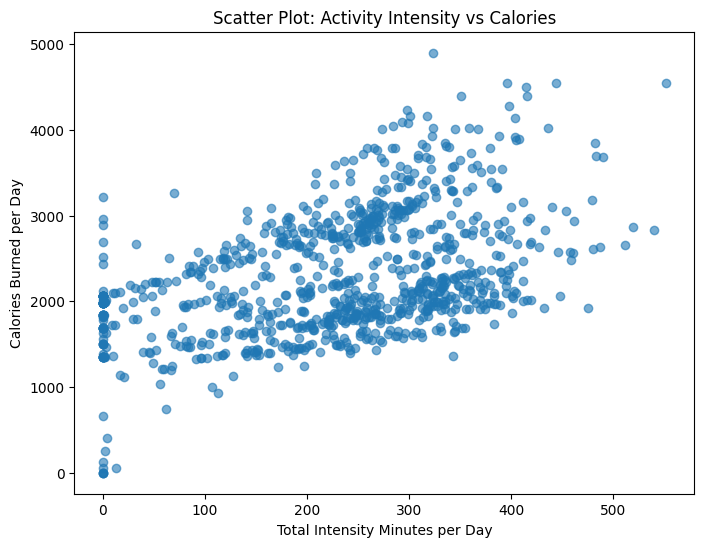

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    scatter_df['total_intensity_minutes'],
    scatter_df['Calories'],
    alpha=0.6
)
plt.xlabel('Total Intensity Minutes per Day')
plt.ylabel('Calories Burned per Day')
plt.title('Scatter Plot: Activity Intensity vs Calories')
plt.show()


---

### Users whose intensity pattern is highly inconsistent.

In [ ]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH daily_intensity AS (
                SELECT
                    ID,
                    ActivityDate,
                    (LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes) AS total_intensity_minutes
                FROM dailyactivity_merged
            ),
            user_variation AS (
                SELECT
                    ID,
                    MIN(total_intensity_minutes) AS min_intensity,
                    MAX(total_intensity_minutes) AS max_intensity,
                    AVG(total_intensity_minutes) AS avg_intensity,
                    (MAX(total_intensity_minutes) - MIN(total_intensity_minutes)) AS intensity_range
                FROM daily_intensity
                GROUP BY ID
            )
            SELECT
                ID,
                min_intensity,
                max_intensity,
                avg_intensity,
                intensity_range
            FROM user_variation
            ORDER BY intensity_range DESC;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,ID,min_intensity,max_intensity,avg_intensity,intensity_range
0,6117666160,0,540,291.9643,540
1,4702921684,0,490,268.6452,490
2,7007744171,0,479,328.0385,479
3,2026352035,17,475,257.0000,458
4,8877689391,105,552,310.7097,447
5,1644430081,38,482,209.4000,444
6,5577150313,0,444,265.1000,444
7,4388161847,0,436,272.8710,436
8,2347167796,4,427,286.5556,423
9,4020332650,0,405,87.4839,405


####  This result identifies users whose daily activity intensity varies the most across days. Users with a higher intensity range switch frequently between very active and very inactive days, indicating highly inconsistent activity patterns.

----

### Users with less than 6 hours of sleep for 7 consecutive days

In [58]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            SELECT ID, COUNT(*) STREAK 
             FROM (SELECT *, DATE_SUB(SleepDay,  INTERVAL ROWNUM DAY) AS STREAK
            FROM
             (SELECT *, ROW_NUMBER() OVER(PARTITION BY ID ORDER BY SLEEPDAY) ROWNUM
            FROM SLEEPDAY_MERGED
            WHERE TotalTimeInBed <=360) A) B
             GROUP BY ID , STREAK
             HAVING COUNT(*)>7;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,Id,STREAK


In [57]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH sleep_flagged AS (
                SELECT
                    ID,
                    SleepDay,
                    CASE 
                        WHEN TotalTimeInBed <= 360 THEN 1
                        ELSE 0
                    END AS low_sleep_flag
                FROM sleepday_merged
            ),
            sleep_streaks AS (
                SELECT
                    ID,
                    SleepDay,
                    low_sleep_flag,
                    DATE_SUB(
                        SleepDay,
                        INTERVAL ROW_NUMBER() OVER (PARTITION BY ID ORDER BY SleepDay) DAY
                    ) AS streak_group
                FROM sleep_flagged
                WHERE low_sleep_flag = 1
            )
            SELECT
                ID,
                COUNT(*) AS streak_length
            FROM sleep_streaks
            GROUP BY ID, streak_group
            HAVING COUNT(*) > 1
            ORDER BY streak_length DESC;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df


,ID,streak_length
0,1503960366,2
1,1503960366,2
2,1644430081,2
3,4388161847,2
4,4445114986,2


---

### Compare sleep duration on active vs inactive days.

In [ ]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH daily_intensity AS (
                SELECT
                    ID,
                    ActivityDate,
                    (LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes) AS total_intensity_minutes
                FROM dailyactivity_merged
            ),
            avg_intensity AS (
                SELECT
                    AVG(total_intensity_minutes) AS avg_intensity_minutes
                FROM daily_intensity
            ),
            activity_status AS (
                SELECT
                    d.ID,
                    d.ActivityDate,
                    CASE
                        WHEN d.total_intensity_minutes >= a.avg_intensity_minutes
                             THEN 'ACTIVE'
                        ELSE 'INACTIVE'
                    END AS activity_status
                FROM daily_intensity d
                CROSS JOIN avg_intensity a
            ),
            sleep_activity AS (
                SELECT
                    s.ID,
                    a.activity_status,
                    s.TotalTimeInBed
                FROM sleepday_merged s
                JOIN activity_status a
                  ON s.ID = a.ID
                 AND s.SleepDay = a.ActivityDate
            )
            SELECT
                activity_status,
                COUNT(*) AS day_count,
                ROUND(AVG(TotalTimeInBed), 2) AS avg_sleep_minutes
            FROM sleep_activity
            GROUP BY activity_status;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,activity_status,day_count,avg_sleep_minutes
0,ACTIVE,284,444.87
1,INACTIVE,129,488.96


#### Inactive days show a higher average sleep duration than active days, suggesting that users tend to spend more time in bed on days with lower physical activity. This may indicate rest or recovery behavior on inactive days rather than increased sleep quality driven by activity.

---

### Identify late sleepers based on sleep start time.

In [70]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            SELECT DISTINCT SLEEPDAY  FROM SLEEPDAY_MERGED;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,SLEEPDAY
0,2016-04-12
1,2016-04-13
2,2016-04-15
3,2016-04-16
4,2016-04-17
5,2016-04-19
6,2016-04-20
7,2016-04-21
8,2016-04-23
9,2016-04-24


---

### Detect continuous inactivity periods longer than 2 hours.

In [72]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH inactive_minutes AS (
                SELECT
                    ID,
                    ActivityMinute,
                    ROW_NUMBER() OVER (PARTITION BY ID ORDER BY ActivityMinute) AS rn
                FROM minuteintensitiesnarrow_merged
                WHERE Intensity = 0
            ),
            inactivity_groups AS (
                SELECT
                    ID,
                    ActivityMinute,
                    DATE_SUB(ActivityMinute, INTERVAL rn MINUTE) AS grp
                FROM inactive_minutes
            )
            SELECT
                ID,
                MIN(ActivityMinute) AS inactivity_start,
                MAX(ActivityMinute) AS inactivity_end,
                COUNT(*) AS inactivity_duration_minutes
            FROM inactivity_groups
            GROUP BY ID, grp
            HAVING COUNT(*) > 120
            ORDER BY inactivity_duration_minutes DESC;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,ID,inactivity_start,inactivity_end,inactivity_duration_minutes
0,1927972279,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,42899
1,4020332650,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,41218
2,1844505072,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,40237
3,1624580081,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,38961
4,2320127002,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,37838
5,8583815059,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,37812
6,8792009665,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,37513
7,7086361926,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,37450
8,4445114986,4/12/2016 1:00:00 PM,5/9/2016 9:59:00 PM,37262
9,8378563200,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,37029


#### This result identifies long continuous inactivity periods exceeding two hours, indicating prolonged sedentary behavior. Such patterns may reflect extended sitting, inactivity habits, or device non-usage, which can negatively impact health if frequent.

---

### Find minute-level spikes in intensity.

In [73]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH inactive_minutes AS (
                SELECT
                    ID,
                    ActivityMinute,
                    ROW_NUMBER() OVER (PARTITION BY ID ORDER BY ActivityMinute) AS rn
                FROM minuteintensitiesnarrow_merged
                WHERE Intensity = 0
            ),
            inactivity_groups AS (
                SELECT
                    ID,
                    ActivityMinute,
                    DATE_SUB(ActivityMinute, INTERVAL rn MINUTE) AS grp
                FROM inactive_minutes
            )
            SELECT
                ID,
                MIN(ActivityMinute) AS inactivity_start,
                MAX(ActivityMinute) AS inactivity_end,
                COUNT(*) AS inactivity_duration_minutes
            FROM inactivity_groups
            GROUP BY ID, grp
            HAVING COUNT(*) > 120
            ORDER BY inactivity_duration_minutes DESC;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df

,ID,inactivity_start,inactivity_end,inactivity_duration_minutes
0,1927972279,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,42899
1,4020332650,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,41218
2,1844505072,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,40237
3,1624580081,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,38961
4,2320127002,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,37838
5,8583815059,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,37812
6,8792009665,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,37513
7,7086361926,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,37450
8,4445114986,4/12/2016 1:00:00 PM,5/9/2016 9:59:00 PM,37262
9,8378563200,4/12/2016 1:00:00 AM,5/9/2016 9:59:00 PM,37029


---

## **Hourly Activity Analysis**

####  **peak activity hour for each user.**

In [74]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH ranked_hours AS (
                SELECT
                    Id,
                    HOUR(
                        STR_TO_DATE(ActivityHour, '%m/%d/%Y %h:%i:%s %p')
                    ) AS activity_hour,
                    StepTotal,
                    ROW_NUMBER() OVER (
                        PARTITION BY Id
                        ORDER BY StepTotal DESC
                    ) AS rn
                FROM hourlySteps_merged
            )
            SELECT
                Id,
                activity_hour AS peak_activity_hour,
                StepTotal AS peak_hour_steps
            FROM ranked_hours
            WHERE rn = 1
            ORDER BY Id;
        """)
    )

df = pd.DataFrame(result.fetchall(), columns=result.keys())
df


,Id,peak_activity_hour,peak_hour_steps
0,1503960366,21,5934
1,1624580081,9,8976
2,1644430081,19,4660
3,1844505072,20,2043
4,1927972279,11,2109
5,2022484408,9,5596
6,2026352035,16,2375
7,2320127002,15,2208
8,2347167796,8,5291
9,2873212765,8,4534


#### **Identify hours with highest sedentary behavior.**

In [75]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH base AS (
                SELECT
                    Id,
                    HOUR(
                        STR_TO_DATE(ActivityHour, '%m/%d/%Y %h:%i:%s %p')
                    ) AS activity_hour,
                    StepTotal
                FROM hourlySteps_merged
            ),
            ranked_hours AS (
                SELECT
                    Id,
                    activity_hour,
                    SUM(StepTotal) AS total_steps,
                    ROW_NUMBER() OVER (
                        PARTITION BY Id
                        ORDER BY SUM(StepTotal) ASC
                    ) AS rn
                FROM base
                GROUP BY Id, activity_hour
            )
            SELECT
                Id,
                activity_hour,
                total_steps
            FROM ranked_hours
            WHERE rn = 1
            ORDER BY Id
        """)
    )

    df = pd.DataFrame(result.fetchall(), columns=result.keys())

df


,Id,activity_hour,total_steps
0,1503960366,5,63
1,1624580081,4,213
2,1644430081,6,14
3,1844505072,4,0
4,1927972279,5,0
5,2022484408,0,0
6,2026352035,2,19
7,2320127002,4,1371
8,2347167796,3,4
9,2873212765,1,0


#### **Compare weekday vs weekend hourly activity.**

In [76]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH base AS (
                SELECT
                    HOUR(
                        STR_TO_DATE(ActivityHour, '%m/%d/%Y %h:%i:%s %p')
                    ) AS activity_hour,
                    CASE
                        WHEN DAYOFWEEK(
                            STR_TO_DATE(ActivityHour, '%m/%d/%Y %h:%i:%s %p')
                        ) IN (1, 7) THEN 'Weekend'
                        ELSE 'Weekday'
                    END AS day_type,
                    StepTotal
                FROM hourlySteps_merged
            )
            SELECT
                activity_hour,
                AVG(CASE WHEN day_type = 'Weekday' THEN StepTotal END) AS weekday_steps,
                AVG(CASE WHEN day_type = 'Weekend' THEN StepTotal END) AS weekend_steps
            FROM base
            GROUP BY activity_hour
            ORDER BY activity_hour
        """)
    )

    df = pd.DataFrame(result.fetchall(), columns=result.keys())

df



,activity_hour,weekday_steps,weekend_steps
0,0,32.7826,68.7869
1,1,18.6652,35.7037
2,2,12.0319,31.5309
3,3,6.1754,7.1399
4,4,14.4093,7.8519
5,5,54.5747,13.5144
6,6,219.5392,62.3374
7,7,349.2326,183.7860
8,8,449.4215,365.6049
9,9,423.5843,460.8148


#### **users active mostly at night (10 PM – 5 AM).**

In [77]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH base AS (
                SELECT
                    Id,
                    HOUR(
                        STR_TO_DATE(ActivityHour, '%m/%d/%Y %h:%i:%s %p')
                    ) AS activity_hour,
                    StepTotal
                FROM hourlySteps_merged
            ),
            agg AS (
                SELECT
                    Id,
                    SUM(StepTotal) AS total_steps,
                    SUM(
                        CASE
                            WHEN activity_hour IN (22,23,0,1,2,3,4,5)
                            THEN StepTotal
                            ELSE 0
                        END
                    ) AS night_steps
                FROM base
                GROUP BY Id
            )
            SELECT
                Id,
                total_steps,
                night_steps,
                ROUND(night_steps / total_steps * 100, 2) AS night_activity_pct
            FROM agg
            ORDER BY night_activity_pct DESC
        """)
    )

    df = pd.DataFrame(result.fetchall(), columns=result.keys())

df

,Id,total_steps,night_steps,night_activity_pct
0,3977333714,328244,68817,20.97
1,2320127002,146035,26974,18.47
2,1844505072,79942,11290,14.12
3,4445114986,148548,20626,13.89
4,8792009665,53750,7396,13.76
5,1503960366,374546,48641,12.99
6,4020332650,68399,8562,12.52
7,6775888955,65371,8151,12.47
8,8053475328,457463,55579,12.15
9,1644430081,217927,22400,10.28


## **Weight & BMI Analysis**

#### **Net weight change per userr**

In [78]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            WITH ranked AS (
                SELECT
                    Id,
                    DATE(Date) AS log_date,
                    WeightKg,
                    ROW_NUMBER() OVER (
                        PARTITION BY Id ORDER BY DATE(Date)
                    ) AS rn_asc,
                    ROW_NUMBER() OVER (
                        PARTITION BY Id ORDER BY DATE(Date) DESC
                    ) AS rn_desc
                FROM weightLogInfo_merged
            )
            SELECT
                f.Id,
                f.WeightKg AS start_weight,
                l.WeightKg AS end_weight,
                l.WeightKg - f.WeightKg AS net_weight_change
            FROM ranked f
            JOIN ranked l
              ON f.Id = l.Id
            WHERE f.rn_asc = 1
              AND l.rn_desc = 1
        """)
    )

    df = pd.DataFrame(result.fetchall(), columns=result.keys())

df


,Id,start_weight,end_weight,net_weight_change
0,1503960366,52.599998,52.599998,0.0
1,1927972279,133.500000,133.500000,0.0
2,2873212765,56.700001,56.700001,0.0
3,4319703577,72.400002,72.400002,0.0
4,4558609924,69.699997,69.699997,0.0
5,5577150313,90.699997,90.699997,0.0
6,6962181067,62.500000,62.500000,0.0
7,8877689391,85.800003,85.800003,0.0


#### **users who meet 10,000 steps at least 15 days in a month**

In [79]:
with engine.connect() as conn:
    result = conn.execute(
        text("""
            SELECT
                Id,
                YEAR(ActivityDate) AS year,
                MONTH(ActivityDate) AS month,
                COUNT(*) AS days_10k_steps
            FROM dailyActivity_merged
            WHERE TotalSteps >= 10000
            GROUP BY
                Id,
                YEAR(ActivityDate),
                MONTH(ActivityDate)
            HAVING COUNT(*) >= 15
            ORDER BY Id, year, month;
        """)
    )

    df = pd.DataFrame(result.fetchall(), columns=result.keys())

df

,Id,year,month,days_10k_steps
0,1503960366,2016,4,16
1,2022484408,2016,4,18
2,6962181067,2016,4,15
3,8053475328,2016,4,18
4,8877689391,2016,4,18
